In [4]:
#Matrix column entries (attributes):

#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 


In [5]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv("parkinsons.csv")
print(data.head(5))

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
#gives the dimension of the dataset, (row, column)
data.shape

(195, 24)

In [9]:
#checks out for any null values in the dataset
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
#finds the count, mean, standard diviation, percentile, maximum and minimum values for the dataset
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
#checks the total number of patients with the disease and those without it
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [12]:
#preparing data for the model
x = data.drop(['name', 'status'], axis = 1)
y = data['status']
print(x.shape)


(195, 22)


In [13]:
y.shape

(195,)

In [14]:
#Splitting dataset into train and testing: 80% is used for training and 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)
print(x.shape, x_train.shape, x_test.shape)


(195, 22) (156, 22) (39, 22)


In [15]:
#Standardize features

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

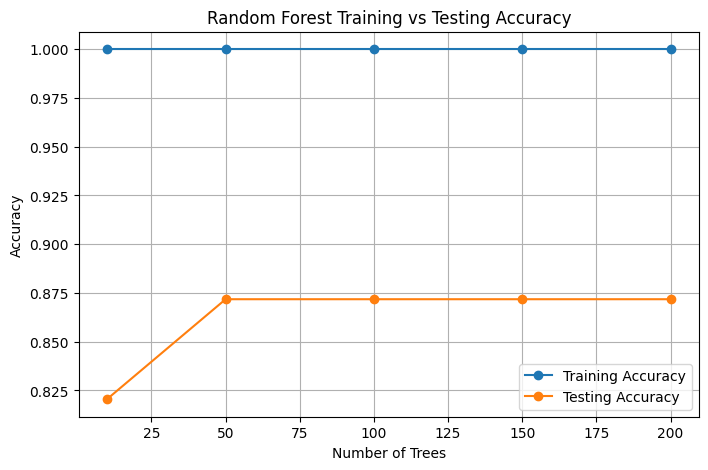

In [16]:
train_scores, test_scores = [], []
n_estimators = [10, 50, 100, 150, 200]

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=20)
    model.fit(x_train, y_train)
    
    # Record training and testing accuracy
    train_scores.append(accuracy_score(y_train, model.predict(x_train)))
    test_scores.append(accuracy_score(y_test, model.predict(x_test)))

# Plot training vs testing accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, train_scores, label="Training Accuracy", marker='o')
plt.plot(n_estimators, test_scores, label="Testing Accuracy", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Training vs Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#show the data that will be used for training
x_train

array([[ 2.17870504,  0.58474775,  2.80270804, ..., -1.69749942,
        -0.16153601, -1.32288981],
       [-0.9272479 ,  4.21106832, -0.47124254, ..., -1.38897987,
        -0.63753206, -0.79731342],
       [-0.71478691, -0.58934429,  0.04857995, ...,  0.44378259,
         0.74740319,  1.4398625 ],
       ...,
       [-0.78076859, -0.60665393, -0.45825941, ...,  0.01501339,
         0.82153401,  0.1083794 ],
       [-0.2961454 ,  0.21751333, -0.73391388, ..., -0.23580359,
        -0.49507139,  0.26409629],
       [-0.67871693, -0.61338241, -0.34036886, ...,  0.16699267,
         0.64829919,  1.85967604]])

In [18]:
#shows data that will be used for testing
x_test

array([[ 1.83564921e+00,  5.99115740e-01,  2.53548787e+00,
        -8.91903827e-01, -1.01641111e+00, -7.60205220e-01,
        -8.79394916e-01, -7.60299079e-01, -8.33136099e-01,
        -8.17448136e-01, -8.11776820e-01, -7.15001780e-01,
        -8.40399706e-01, -8.11444223e-01, -5.55018306e-01,
         1.06752965e+00, -2.22250544e+00, -7.88384636e-01,
        -1.71288523e+00, -2.12603441e+00, -1.03470216e+00,
        -1.52125337e+00],
       [-9.50756931e-01, -8.18057675e-01, -1.30364458e-01,
        -6.36558625e-01, -4.39329170e-01, -6.10430829e-01,
        -5.68709653e-01, -6.10522644e-01, -8.08725243e-01,
        -7.76145493e-01, -7.69379059e-01, -7.35075618e-01,
        -7.72609721e-01, -7.69375003e-01, -5.31368442e-01,
         9.74018918e-01, -9.64252297e-01,  8.00931671e-01,
        -3.12394740e-01, -3.86772067e-01, -1.10977893e+00,
        -2.96120814e-01],
       [ 1.82174418e+00,  4.05910721e-01,  2.59419623e+00,
        -7.08939942e-01, -9.88931020e-01, -5.61591353e-01,
    

In [19]:
# Train Model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
# Predict and evaluate
x_test_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, x_test_pred))
print(classification_report(y_test, x_test_pred))

Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.87      1.00      0.93        27

    accuracy                           0.90        39
   macro avg       0.94      0.83      0.87        39
weighted avg       0.91      0.90      0.89        39



In [21]:
# Predict and evaluate
x_train_pred = model.predict(x_train)
print("Accuracy:", accuracy_score(y_train, x_train_pred))
print(classification_report(y_train, x_train_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       120

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [22]:
#for input new attributes
input_data = (183.1082981, 598.2359967, 75.09740677, 0.027638105, 0.000160658, 0.012225063, 0.013374182, 0.036675189, 0.112063867, 1.10725542, 0.044992269, 0.065939836, 0.114818352, 0.134976806, 0.075193531, 13.29901629, 1.92981403, 0.409083189, 2.31782663, 11.40741698, 0, 1.92981403)

#change input into an numpy array
input_data_np = np.asarray(input_data)
#reshapes the input values
input_data_re = input_data_np.reshape(1, -1)
#standardize the input data
s_data = ss.transform(input_data_re)
#prediction
pred = model.predict(s_data)

print(pred)

if (pred[0] == 1):
    print("Positive, Parkinson's Found")
else:
    print("Negative, No Parkinson's Found")

[1]
Positive, Parkinson's Found


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Get feature importances
importances = model.feature_importances_
feature_names = x.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

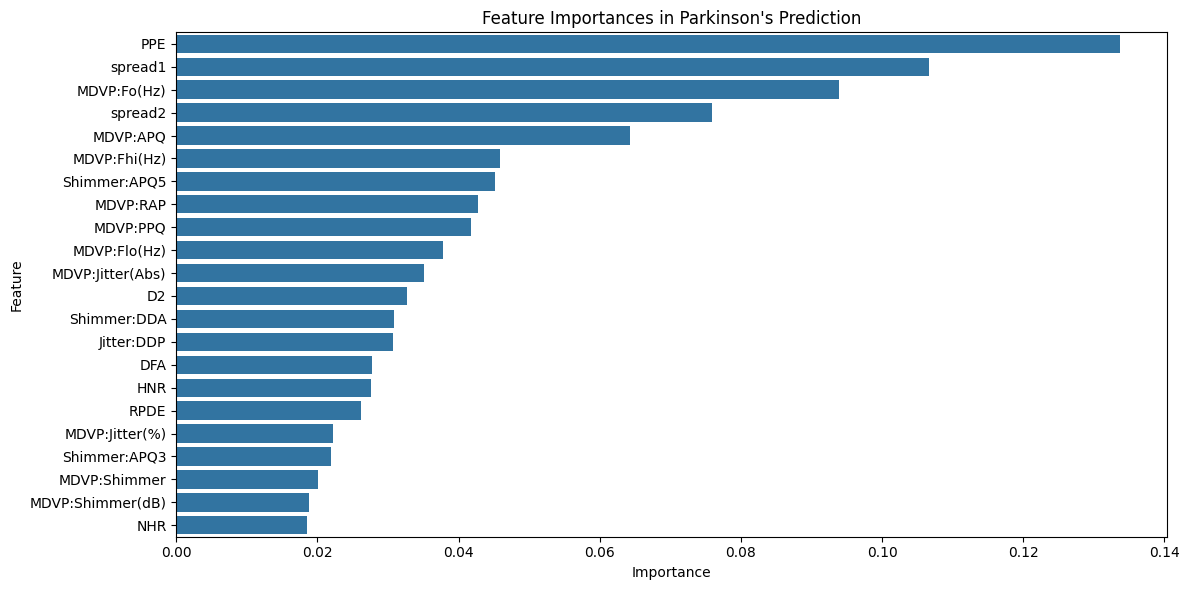

In [24]:
# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importances in Parkinson's Prediction")
plt.tight_layout()
plt.show()

In [25]:
# Input fields for the 22 features (excluding 'name' and 'status')
fields = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
    'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
    'spread2', 'D2', 'PPE'
]

widgets_dict = {name: widgets.FloatText(description=name, layout=widgets.Layout(width='300px')) for name in fields}

# Display all widgets
form_items = [widgets_dict[name] for name in fields]
form = widgets.VBox(form_items)
display(form)

In [26]:
predict_button = widgets.Button(description="Predict Disease Status", button_style='info')

output = widgets.Output()

def predict_action(b):
    input_data = np.array([widgets_dict[name].value for name in fields]).reshape(1, -1)
    prediction = model.predict(input_data)
    result = "Parkinson's Detected 🧠" if prediction[0] == 1 else "No Parkinson's 🚫"
    with output:
        output.clear_output()
        print("Prediction:", result)

predict_button.on_click(predict_action)
display(predict_button, output)

Button(button_style='info', description='Predict Disease Status', style=ButtonStyle())

Output()

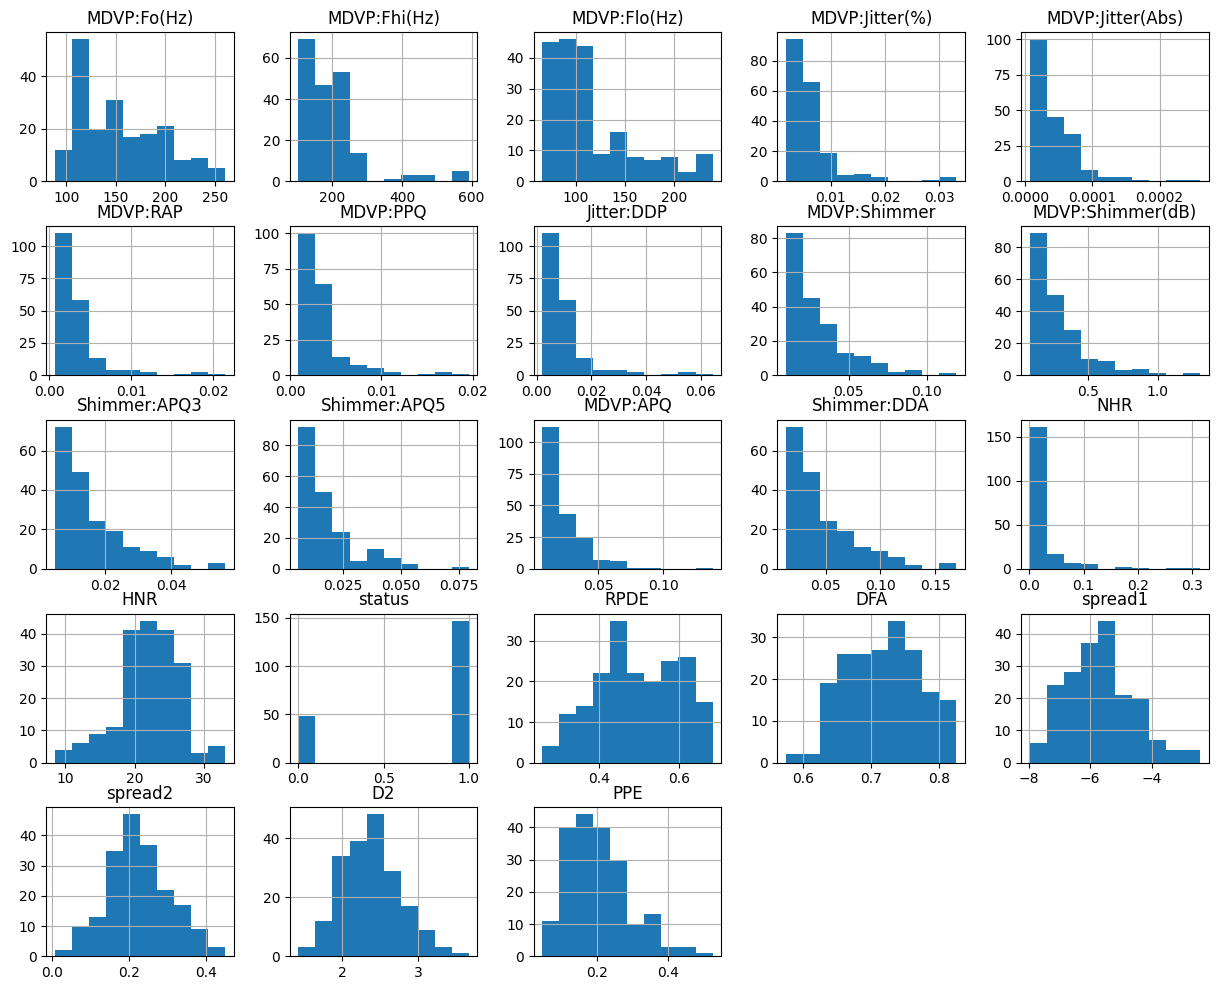

In [27]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.hist(figsize=(15,12));

<Axes: >

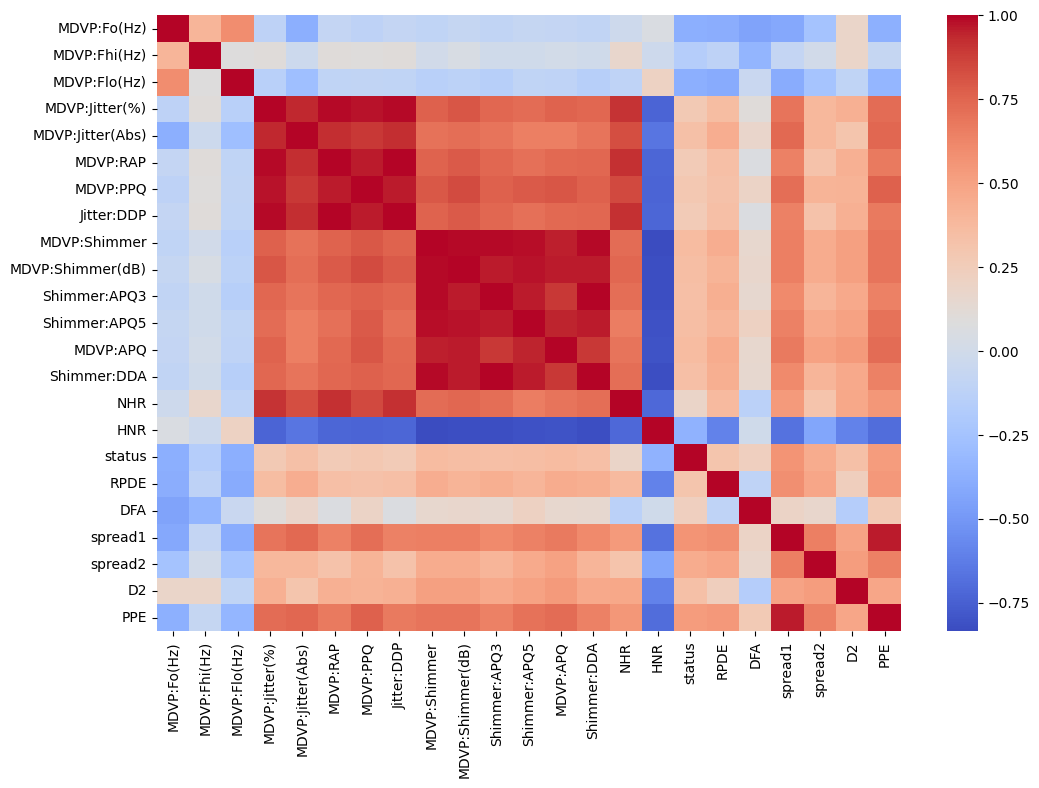

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), cmap="coolwarm", annot=False)

label
1    178
0     90
Name: count, dtype: int64